# Homework week 12
## Fishers Discriminant Analysis

In [547]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
np.random.seed(1)

## Generate Data 1

In [548]:
n = 100
x = np.random.randn(n, 2)
x[:n//2, 0] -= 4
x[n//2:, 0] += 4
x -= np.mean(x, axis=0)
x1 = x
y1 = np.concatenate([np.ones(n//2), 2 * np.ones(n//2)])

## Compute FDA

In [549]:
def FDA(x,y):
    m1 = np.mean(x[y == 1, :], axis=0).reshape(-1,2)
    m2 = np.mean(x[y == 2, :], axis=0).reshape(-1,2)

    # Center the data for each class
    x1 = x[y == 1, :] - m1
    x2 = x[y == 2, :] - m2

    # Calculate the between-class scatter matrix
    S_B = (n / 2) * (m1.T @ m1 + m2.T @ m2)  
    # Calculate the within-class scatter matrix
    S_W = (x1.T @ x1) + (x2.T @ x2)

    # Compute the Fisher's discriminant vector and eigenvalue
    eigenvalues, eigenvectors = eigh(S_B, S_W, eigvals=(1, 1))
    v = eigenvalues[0]
    t = eigenvectors[:, 0]
    return t,v

In [550]:
t,v = FDA(x1,y1)
print(t,v)

[0.11823351 0.01532725] 23.377361848491706


## Plotting

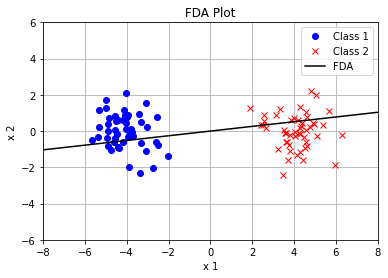

In [551]:
plt.figure(1)
plt.clf()
plt.axis([-8, 8, -6, 6])

plt.plot(x1[y1 == 1, 0], x1[y1 == 1, 1], 'bo')
plt.plot(x1[y1 == 2, 0], x[y1 == 2, 1], 'rx')
plt.plot(np.array([-t[0], t[0]]) * 99, np.array([-t[1], t[1]]) * 99, color = "black")

plt.xlabel('x 1')
plt.ylabel('x 2')
plt.title('FDA Plot')
plt.legend(['Class 1', 'Class 2', 'FDA'])
plt.grid()
plt.show()

## Generate Data 2

In [552]:
n = 100
x = np.random.randn(n, 2)
x[:n // 4, 0] -= 4
x[n // 4:n // 2, 0] += 4
x = x - np.mean(x, axis=0)
x2 = x
y2 = np.concatenate((np.ones(n // 2), 2 * np.ones(n // 2)))

In [553]:
t,v = FDA(x2,y2)
print(t,v)

[-0.00597065  0.09800593] 0.004195298716675413


## Plotting

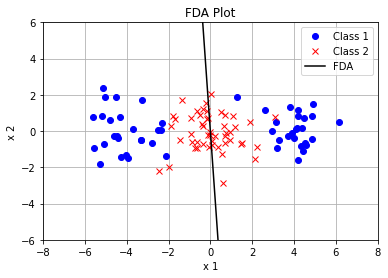

In [554]:
plt.figure(2)
plt.clf()
plt.axis([-8, 8, -6, 6])

plt.plot(x2[y2 == 1, 0], x2[y2 == 1, 1], 'bo')
plt.plot(x2[y2 == 2, 0], x2[y2 == 2, 1], 'rx')
plt.plot(np.array([-t[0], t[0]]) * 99, np.array([-t[1], t[1]]) * 99, color = "black")

plt.xlabel('x 1')
plt.ylabel('x 2')
plt.title('FDA Plot')
plt.legend(['Class 1', 'Class 2', 'FDA'])
plt.grid()
plt.show()

# Compute LFDA

In [555]:
def LFDA(x,y):
    # LFDA
    Sw = np.zeros((2, 2))
    Sb = np.zeros((2, 2))

    for j in range(1, 3):
        p = x[y == j, :]
        nj = np.sum(y == j)

        W = np.exp(-np.sum((p[:, None] - p[None]) ** 2, axis=2))
        G = p.T @ (p.T*np.sum(W, axis=1)).T - p.T @ W @ p

        Sb += G / n + p.T @ p * (1 - nj / n) + (p**2).T @ (p**2) / n
        Sw += G / nj

    # Compute the eigenvectors and eigenvalues
    eigenvalues, eigenvectors = eigh((Sb + Sb.T) / 2, (Sw + Sw.T) / 2, eigvals=(1, 1))

    t = eigenvectors.flatten()
    v = eigenvalues[0]
    return t,v

## Plotting Data - 1

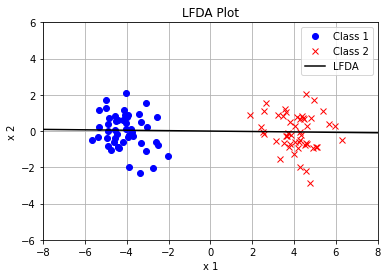

In [556]:
t,v = LFDA(x1,y1)
plt.figure(3)
plt.clf()
plt.axis([-8, 8, -6, 6])

plt.plot(x1[y1 == 1, 0], x1[y1 == 1, 1], 'bo')
plt.plot(x1[y1 == 2, 0], x[y1 == 2, 1], 'rx')
plt.plot(np.array([-t[0], t[0]]) * 99, np.array([-t[1], t[1]]) * 99, color = "black")

plt.xlabel('x 1')
plt.ylabel('x 2')
plt.title('LFDA Plot')
plt.legend(['Class 1', 'Class 2', 'LFDA'])
plt.grid()
plt.show()

## Plotting Data - 2

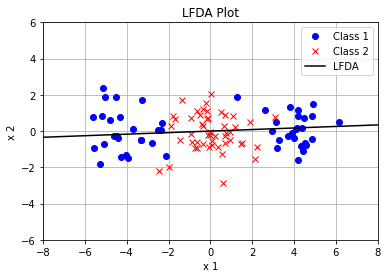

In [557]:
t,v = LFDA(x2,y2)
plt.figure(4)
plt.clf()
plt.axis([-8, 8, -6, 6])

plt.plot(x2[y2 == 1, 0], x2[y2 == 1, 1], 'bo')
plt.plot(x2[y2 == 2, 0], x2[y2 == 2, 1], 'rx')
plt.plot(np.array([-t[0], t[0]]) * 99, np.array([-t[1], t[1]]) * 99, color = "black")

plt.xlabel('x 1')
plt.ylabel('x 2')
plt.title('LFDA Plot')
plt.legend(['Class 1', 'Class 2', 'LFDA'])
plt.grid()
plt.show()